# Samples - scan dark photon **decay length**
----
(2018, processed with `CMSSW_10_2_0`)

`SIDMmumu_Mps-200_MZp-1p2_ctau-XXX.root`

XXX = [1.2e-3, 1.2e-2, 0.12, 0.6, 1.2, 3.6] cm

- $M_{pscalar}    = 200 GeV$
- $M_{darkphoton} = 1.2 GeV$
- decaylength    = [0.1, 1, 10, 50, 100, 300] cm

In [1]:
import pandas as pd
import numpy as np
import uproot
from collections import OrderedDict

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['grid.linestyle'] = ':'

In [2]:


trees = OrderedDict({
    0.1 : uproot.open('../Firefighter/washAOD/test/2018/SIDMmumu_Mps-200_MZp-1p2_ctau-1p20e-03.root')['GEN/gen'],
      1 : uproot.open('../Firefighter/washAOD/test/2018/SIDMmumu_Mps-200_MZp-1p2_ctau-0p012.root'   )['GEN/gen']   ,
     10 : uproot.open('../Firefighter/washAOD/test/2018/SIDMmumu_Mps-200_MZp-1p2_ctau-0p12.root'    )['GEN/gen']    ,
     50 : uproot.open('../Firefighter/washAOD/test/2018/SIDMmumu_Mps-200_MZp-1p2_ctau-0p6.root'     )['GEN/gen']     ,
    100 : uproot.open('../Firefighter/washAOD/test/2018/SIDMmumu_Mps-200_MZp-1p2_ctau-1p2.root'     )['GEN/gen']     ,
    300 : uproot.open('../Firefighter/washAOD/test/2018/SIDMmumu_Mps-200_MZp-1p2_ctau-3p6.root'     )['GEN/gen']     
})

In [3]:
# for k, df in dfs.items():
#     df.columns = [x.decode() for x in df.columns]

In [4]:
trees[1].keys()

[b'nGen',
 b'pid',
 b'charge',
 b'pt',
 b'pz',
 b'eta',
 b'phi',
 b'mass',
 b'energy',
 b'vxy',
 b'vz',
 b'pairInvM',
 b'pairDeltaR',
 b'pairPid']

## muon
### pT, eta, phi

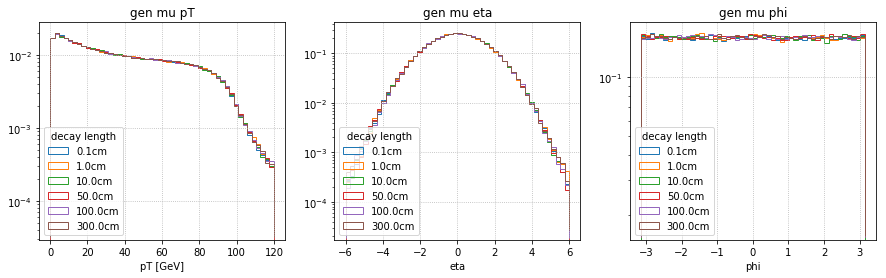

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

for k, t in trees.items():
    muons = np.abs(t.array('pid').content) == 13

    pt  = t.array('pt') .content[muons]
    eta = t.array('eta').content[muons]
    phi = t.array('phi').content[muons]
    ax[0].hist(pt,  bins=50, range=(0,120), histtype='step', label='%.1fcm'%k, density=True, log=True)
    ax[1].hist(eta, bins=50, range=(-6,6), histtype='step', label='%.1fcm'%k,  density=True, log=True)
    ax[2].hist(phi, bins=50, histtype='step', label='%.1fcm'%k, density=True, log=True)

ax[0].set_xlabel('pT [GeV]')
ax[1].set_xlabel('eta')
ax[2].set_xlabel('phi')

ax[0].set_title('gen mu pT')
ax[1].set_title('gen mu eta')
ax[2].set_title('gen mu phi')

for a in ax:
    a.legend(loc='lower left', title='decay length')
    a.grid()

### vxy, vz

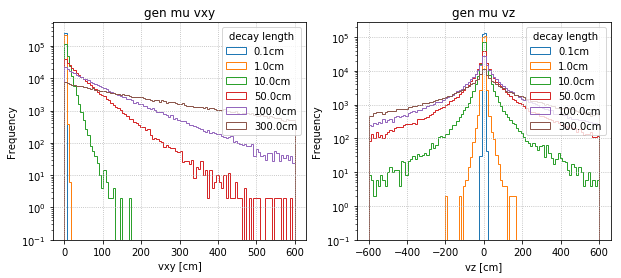

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

for k, t in trees.items():
    mu = np.abs(t.array('pid').content) == 13
    
    muons = pd.DataFrame({'vxy': t.array('vxy').content[mu],
                          'vz' : t.array('vz') .content[mu]})
    
    muons['vxy'].plot.hist(bins=100, ax=ax[0], histtype='step', label='%.1fcm'%k, range=(0,   600), title='gen mu vxy', log=True)
    muons['vz'] .plot.hist(bins=100, ax=ax[1], histtype='step', label='%.1fcm'%k, range=(-600,600), title='gen mu vz',  log=True)

ax[0].set_xlabel('vxy [cm]')
ax[1].set_xlabel('vz [cm]')

for a in ax:
    a.legend(loc='best', title='decay length')
    a.grid()

### mupair invM, deltaR

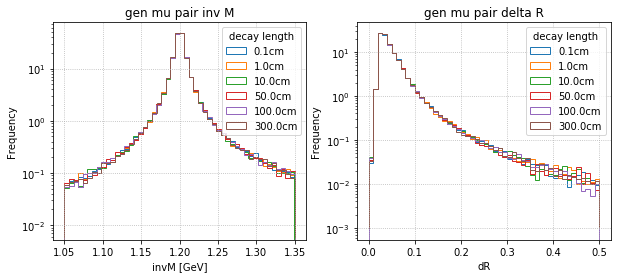

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

for k, t in trees.items():
    mp = t.array('pairPid').content == 13
    mupairs = pd.DataFrame({'pairInvM'  : t.array('pairInvM').content[mp],
                            'pairDeltaR': t.array('pairDeltaR').content[mp]})
    
    mupairs['pairInvM']  .plot.hist(bins=50, ax=ax[0], histtype='step', label='%.1fcm'%k, title='gen mu pair inv M', density=True, log=True)
    mupairs['pairDeltaR'].plot.hist(bins=50, ax=ax[1], histtype='step', label='%.1fcm'%k, range=(0,0.5), title='gen mu pair delta R', density=True, log=True)

ax[0].set_xlabel('invM [GeV]')
ax[1].set_xlabel('dR')

for a in ax:
    a.legend(loc='best', title='decay length')
    a.grid()

## dark photon

### pT, eta, phi

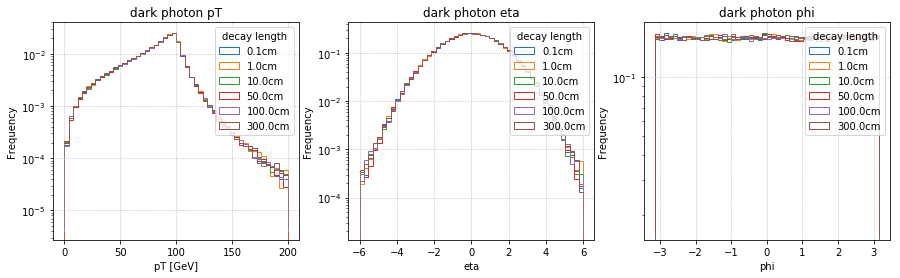

In [11]:
fig, ax = plt.subplots(1,3, figsize=(15,4))

for k, t in trees.items():
    df = t.pandas.df(["pid", "pt", "eta", "phi"])
    df.columns = [x.decode() for x in df.columns]
    dps = df.query('pid==32')
    
    dps['pt'] .plot.hist(bins=50, ax=ax[0], histtype='step', label='%.1fcm'%k, range=(0,200), title='dark photon pT', density=True, log=True)
    dps['eta'].plot.hist(bins=50, ax=ax[1], histtype='step', label='%.1fcm'%k, range=(-6,6), title='dark photon eta', density=True, log=True)
    dps['phi'].plot.hist(bins=50, ax=ax[2], histtype='step', label='%.1fcm'%k, title='dark photon phi', density=True, log=True)

ax[0].set_xlabel('pT [GeV]')
ax[1].set_xlabel('eta')
ax[2].set_xlabel('phi')

for a in ax:
    a.legend(loc='best', title='decay length')
    a.grid()

# Samples - scan dark photon **mass**
---
(2018, processed with `CMSSW_10_2_1`)

fix darkphoton decay length = 1cm at lab frame, vary dark photon mass
- $M_{pseudoscalar}$ = 200 GeV
- $M_{darkphoton}$ = [0.6, 1.2, 2.4, 5.0] GeV
- decaylength = 1cm

In [12]:
treesByDpMass = OrderedDict({
    0.6 : uproot.open('../Firefighter/washAOD/test/2018/SIDMmumu_Mps-200_MZp-0p6_dl-1p0.root')    ['GEN/gen'],
    1.2 : uproot.open('../Firefighter/washAOD/test/2018/SIDMmumu_Mps-200_MZp-1p2_ctau-0p012.root')['GEN/gen'],
    2.4 : uproot.open('../Firefighter/washAOD/test/2018/SIDMmumu_Mps-200_MZp-2p4_dl-1p0.root')    ['GEN/gen'],
    5.0 : uproot.open('../Firefighter/washAOD/test/2018/SIDMmumu_Mps-200_MZp-5p0_dl-1p0.root')    ['GEN/gen']    
})

## muon
### pT, eta, phi

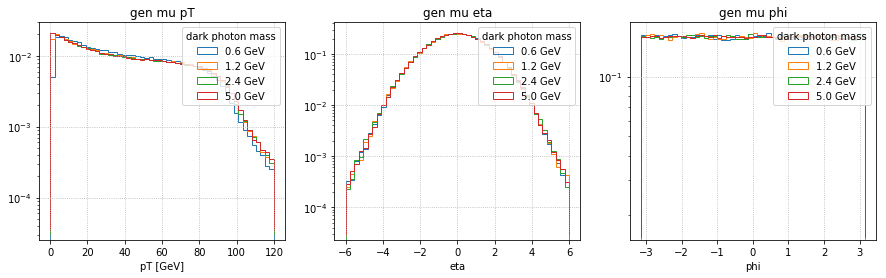

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

for k, t in treesByDpMass.items():
    muons = np.abs(t.array('pid').content) == 13

    pt  = t.array('pt') .content[muons]
    eta = t.array('eta').content[muons]
    phi = t.array('phi').content[muons]
    ax[0].hist(pt,  bins=50, range=(0,120), histtype='step', label='%.1f GeV'%k, density=True, log=True)
    ax[1].hist(eta, bins=50, range=(-6,6), histtype='step', label='%.1f GeV'%k, density=True, log=True)
    ax[2].hist(phi, bins=50, histtype='step', label='%.1f GeV'%k, density=True, log=True)

ax[0].set_xlabel('pT [GeV]')
ax[1].set_xlabel('eta')
ax[2].set_xlabel('phi')

ax[0].set_title('gen mu pT')
ax[1].set_title('gen mu eta')
ax[2].set_title('gen mu phi')

for a in ax:
    a.legend(loc='best', title='dark photon mass')
    a.grid()

### vxy, vz

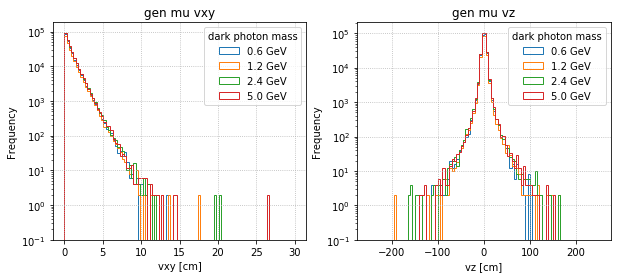

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

for k, t in treesByDpMass.items():
    mu = np.abs(t.array('pid').content) == 13
    
    muons = pd.DataFrame({'vxy': t.array('vxy').content[mu],
                          'vz' : t.array('vz') .content[mu]})
    
    muons['vxy'].plot.hist(bins=100, ax=ax[0], histtype='step', label='%.1f GeV'%k, range=(0,30), title='gen mu vxy', log=True)
    muons['vz'] .plot.hist(bins=100, ax=ax[1], histtype='step', label='%.1f GeV'%k, range=(-250,250), title='gen mu vz', log=True)

ax[0].set_xlabel('vxy [cm]')
ax[1].set_xlabel('vz [cm]')

for a in ax:
    a.legend(loc='best', title='dark photon mass')
    a.grid()

### mupair invM, deltaR

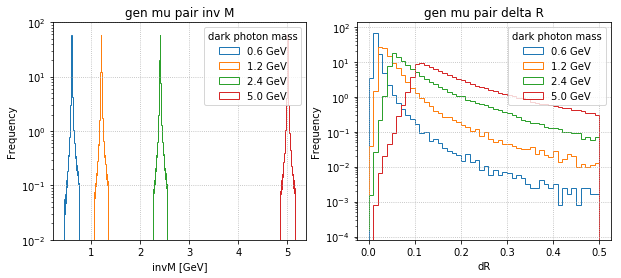

In [17]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

for k, t in treesByDpMass.items():
    mp = t.array('pairPid').content == 13
    mupairs = pd.DataFrame({'pairInvM'  : t.array('pairInvM').content[mp],
                            'pairDeltaR': t.array('pairDeltaR').content[mp]})
    
    mupairs['pairInvM']  .plot.hist(bins=100, ax=ax[0], histtype='step', label='%.1f GeV'%k, title='gen mu pair inv M', density=True, log=True)
    mupairs['pairDeltaR'].plot.hist(bins=50, ax=ax[1], histtype='step', label='%.1f GeV'%k, range=(0,0.5), title='gen mu pair delta R', density=True, log=True)

ax[0].set_xlabel('invM [GeV]')
ax[0].set_ylim(1e-2, 1e2)
ax[1].set_xlabel('dR')

for a in ax:
    a.legend(loc='best', title='dark photon mass')
    a.grid()

## dark photon
### pT, eta, phi

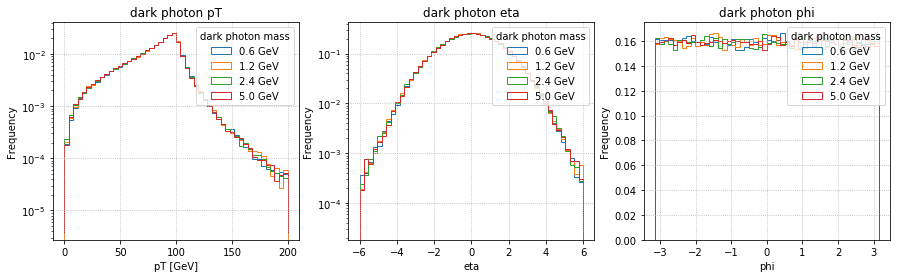

In [16]:
fig, ax = plt.subplots(1,3, figsize=(15,4))

for k, t in treesByDpMass.items():
    df = t.pandas.df(["pid", "pt", "eta", "phi"])
    df.columns = [x.decode() for x in df.columns]
    dps = df.query('pid==32')
    
    dps['pt'] .plot.hist(bins=50, ax=ax[0], histtype='step', label='%.1f GeV'%k, range=(0,200), title='dark photon pT', density=True, log=True)
    dps['eta'].plot.hist(bins=50, ax=ax[1], histtype='step', label='%.1f GeV'%k, range=(-6,6), title='dark photon eta', density=True, log=True)
    dps['phi'].plot.hist(bins=50, ax=ax[2], histtype='step', label='%.1f GeV'%k, title='dark photon phi', density=True)

ax[0].set_xlabel('pT [GeV]')
ax[1].set_xlabel('eta')
ax[2].set_xlabel('phi')

for a in ax:
    a.legend(loc='best', title='dark photon mass')
    a.grid()